#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 06 - Part 05 - Matplotlib</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

### Contents
* Matplotlib
  * Graphs, scatter plots, bar plots
  * multiple plots
  * image or surfaces
* Pandas
  * Dataframes
  * DataFrame operations

# Matplotlib

* Very useful plotting library with a few quirks
* We'll go into more depth with some more complicated uses

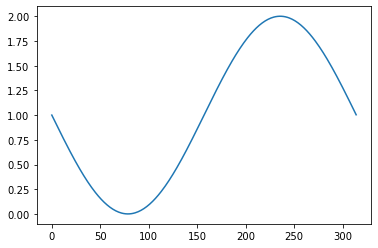

<IPython.core.display.Javascript object>

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.sin(np.arange(-np.pi, np.pi, 0.02)) + 1)

* Plotting multiple plots in one image can be done in multiple ways, here's an easy one:

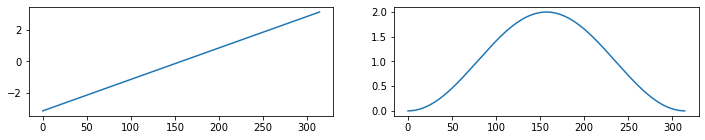

<IPython.core.display.Javascript object>

In [61]:
f, ax = plt.subplots(1, 2, figsize=(12, 2))
ax[0].plot(np.arange(-np.pi, np.pi, 0.02))
ax[1].plot(np.cos(np.arange(-np.pi, np.pi, 0.02)) + 1)

* Titles:

Text(0.5, 1.0, 'Cos + 1')

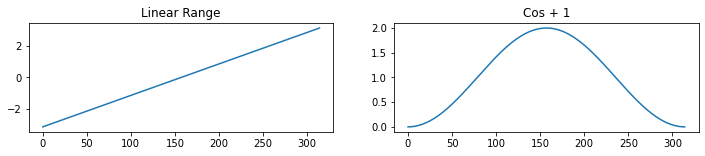

<IPython.core.display.Javascript object>

In [62]:
f, ax = plt.subplots(1, 2, figsize=(12, 2))

ax[0].plot(np.arange(-np.pi, np.pi, 0.02))
ax[0].set_title("Linear Range")

ax[1].plot(np.cos(np.arange(-np.pi, np.pi, 0.02)) + 1)
ax[1].set_title("Cos + 1")

* `plt.subplots` takes as arguments the number of rows and columns to plot plus other configuration values
* It returns the figure object and the subplot objects
* Each subplot object has methods for plotting, setting titles, axes, etc.

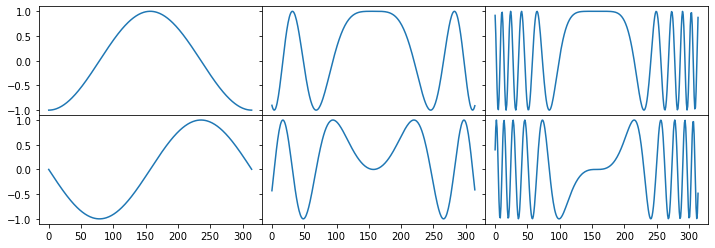

<IPython.core.display.Javascript object>

In [63]:
figure, ax = plt.subplots(2, 3, figsize=(12, 4), 
    sharex='col', sharey='row', # share scales
    gridspec_kw={'hspace': 0, 'wspace': 0}) # remove whitespace

ax[0,0].plot(np.cos(np.arange(-np.pi, np.pi, 0.02)**1))
ax[0,1].plot(np.cos(np.arange(-np.pi, np.pi, 0.02)**2))
ax[0,2].plot(np.cos(np.arange(-np.pi, np.pi, 0.02)**3))
ax[1,0].plot(np.sin(np.arange(-np.pi, np.pi, 0.02)**1))
ax[1,1].plot(np.sin(np.arange(-np.pi, np.pi, 0.02)**2))
ax[1,2].plot(np.sin(np.arange(-np.pi, np.pi, 0.02)**3))

* A `Figure` object was explicitly created in the above
* Whenever functions like `plot` are called with the `pyplot` library (shortened to `plt` everywhere here) a hidden `Figure` object is created
* Creating a `Figure` object yourself allows more flexibility in creating complex figures like this one
* Often not necessary however, intent behind `pyplot` is to replicate Matlab facilities as much as possible

* Multiple values can be plotted on the same plot, either with a single call to `plt.plot` or mulitiple calls:

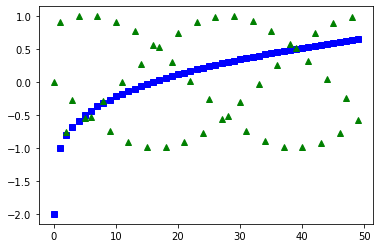

<IPython.core.display.Javascript object>

In [64]:
t = np.arange(0, 50)
plt.plot(t, t ** 0.25 - 2, "bs")  # bs == blue squares
plt.plot(t, np.sin(t * 2), "g^")  # g^ == green triangles
plt.show()

* A wide range of controls for how values are plotted, eg. log scale y-axis:

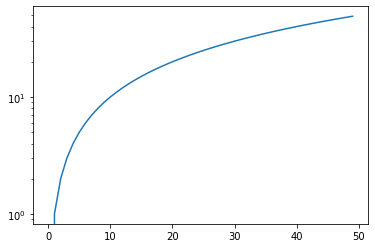

In [6]:
plt.semilogy(t)

* Annotations can also be added

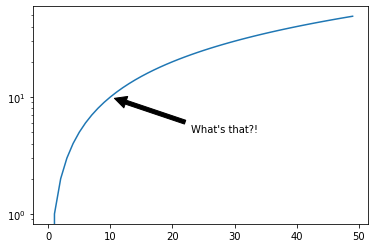

In [31]:
plt.annotate("What's that?!", xy=(10, 10), xytext=(23, 5), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.semilogy(t)

* Axis labels, titles, legends:

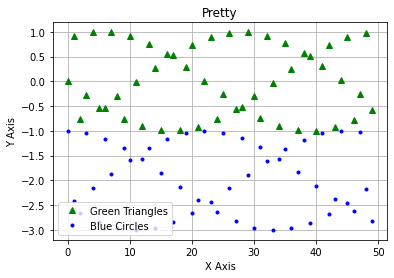

<IPython.core.display.Javascript object>

In [65]:
t = np.arange(0, 50)
plt.plot(t, np.sin(t * 2), "g^", label="Green Triangles")
plt.plot(t, np.cos(t * 2) - 2, "b.", label="Blue Circles")
plt.ylabel("Y Axis")
plt.xlabel("X Axis")
plt.title("Pretty")
plt.grid()
plt.legend()

* The grid lines and their labels can be manipulated as well:

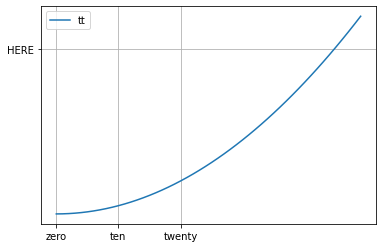

<IPython.core.display.Javascript object>

In [66]:
plt.plot(t * t, label="tt")
plt.legend()
plt.grid()
plt.yticks([2000], labels=["HERE"])
plt.xticks([0, 10, 20], labels=["zero", "ten", "twenty"])
plt.show()

* Other types of plots exist for bar graphs, scatter plots, images, contours, and vector drawing
* Style for axes, grids, colors, overlays, etc. is controllable with figure methods and library functions
* Read the documentation!

/home/localek10/miniconda3/lib/python3.7/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


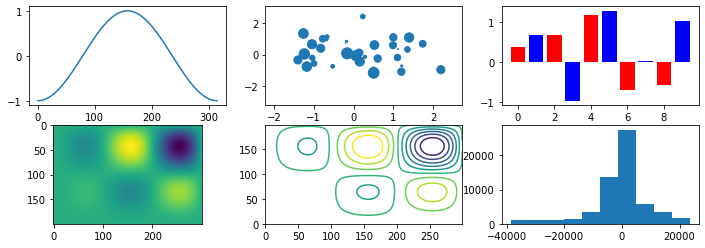

<IPython.core.display.Javascript object>

In [67]:
f, ax = plt.subplots(2, 3, figsize=(12, 4), gridspec_kw={"hspace": 0.2, "wspace": 0.2})

x, y = np.mgrid[:200, :300]  # coordinate grid for 200x300 area
im = np.sin(x * np.pi * 0.01) * np.sin(y * np.pi * 0.01) * x * y
levels = np.arange(im.min(), im.max(), (im.max() - im.min()) / 10)

ax[0, 0].plot(np.cos(np.arange(-np.pi, np.pi, 0.02) ** 1))
ax[0, 1].scatter(np.random.randn(100), np.random.randn(100), np.random.randn(100) * 50)
ax[0, 2].bar(np.arange(10), np.random.randn(10), color=["r", "b"] * 5)
ax[1, 0].imshow(im[::-1])  # images are drawn flipped by default
ax[1, 1].contour(im, levels=levels)
_ = ax[1, 2].hist(im.flat)

* Plotting facilities can be used to draw pictures instead
* This was seen with the tictactoe board example:

Text(0.5, 1.0, 'Tic Tac Toe!')

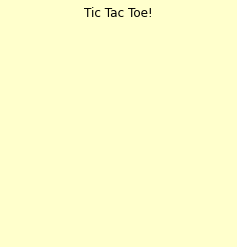

<IPython.core.display.Javascript object>

In [68]:
board = np.random.randint(0, 3, size=(3, 3))  # random board

fig = plt.figure(figsize=[4, 4])  # create a figure
fig.patch.set_facecolor((1, 1, 0.8))

ax = fig.add_subplot(111)  # set values and title
ax.set_axis_off()
ax.set_title("Tic Tac Toe!")

* Now draw the lines by plotting straight lines
* Markers will be drawn by plotting individual points with different markers
* This can be done with Polygon instead but this is easier

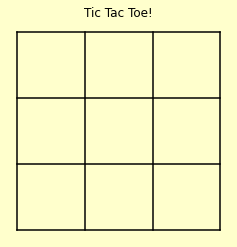

<IPython.core.display.Javascript object>

In [69]:
for x in range(4):
    ax.plot([x, x], [0, 3], "k")  # vertical lines
    ax.plot([0, 3], [x, x], "k")  # horizontal lines

fig  # tell jupyter to draw this again

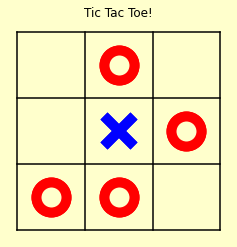

<IPython.core.display.Javascript object>

In [71]:
for i, j in np.ndindex(board.shape):
    val = board[i, j]

    if val in (1, 2):
        marker = "x" if val == 1 else "o"
        color = "b" if val == 1 else "r"

        _=ax.plot(0.5 + i, 2.5 - j, marker, markersize=30, markeredgecolor=color, 
                  markerfacecolor=(1, 1, .8), markeredgewidth=10)

fig

* 3D plotting is also possible:

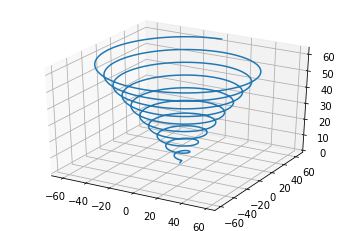

<IPython.core.display.Javascript object>

In [72]:
from mpl_toolkits.mplot3d import Axes3D

a = np.arange(0.0, 20.0 * np.pi, 0.01)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = ax.plot(np.sin(a) * a, np.cos(a) * a, a)

* Images are an important area of matplotlib usage
* Any 2D Numpy array can be plotted as an image
* 3D images are expected to have a RGB third dimension

(300, 451, 3) 0.0 0.90588236


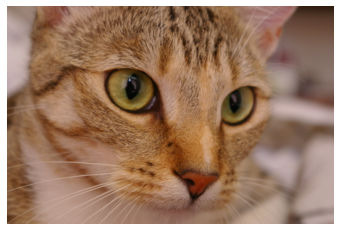

<IPython.core.display.Javascript object>

In [73]:
im = plt.imread("chelsea.png")
print(im.shape, im.min(), im.max())
plt.axis("off")
plt.imshow(im)

* We can just view the red channel:

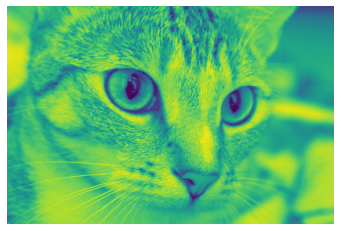

<IPython.core.display.Javascript object>

In [74]:
plt.axis("off")
_ = plt.imshow(im[..., 0])

* With a greyscale color map would be better:

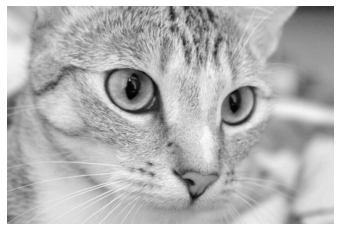

<IPython.core.display.Javascript object>

In [75]:
plt.axis("off")
_ = plt.imshow(im[..., 0], cmap="gray")  # note spelling

* Images being just Numpy arrays exposes them to all the math operations we have from the library:

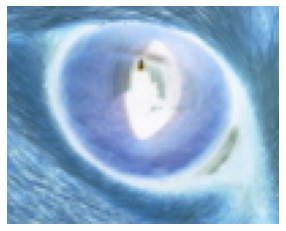

<IPython.core.display.Javascript object>

In [76]:
plt.axis("off")
_ = plt.imshow(1 - im[80:160, 120:220])  # negative image

* Drawing multiple pictures requires subfigure plotting:

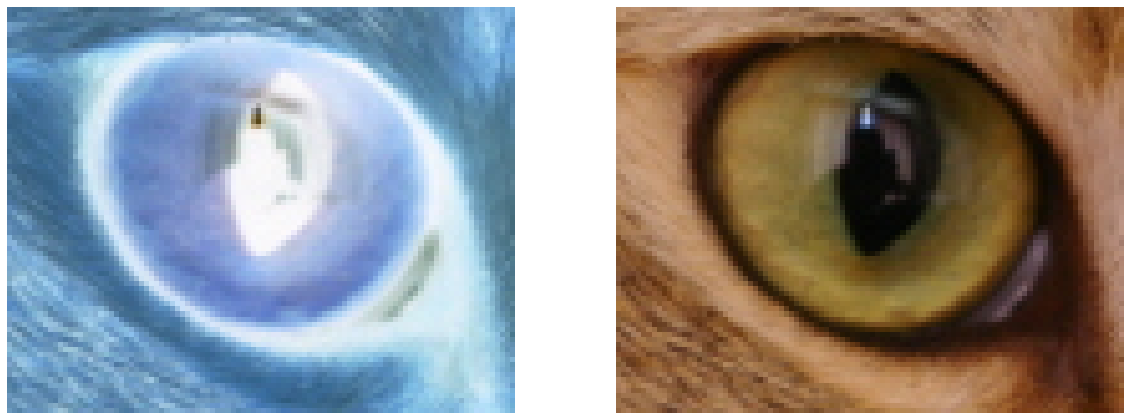

<IPython.core.display.Javascript object>

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].axis("off")
ax[0].imshow(1 - im[80:160, 120:220])
ax[1].axis("off")
ax[1].imshow(im[80:160, 120:220])

* It's often better to just stack images together with Numpy:

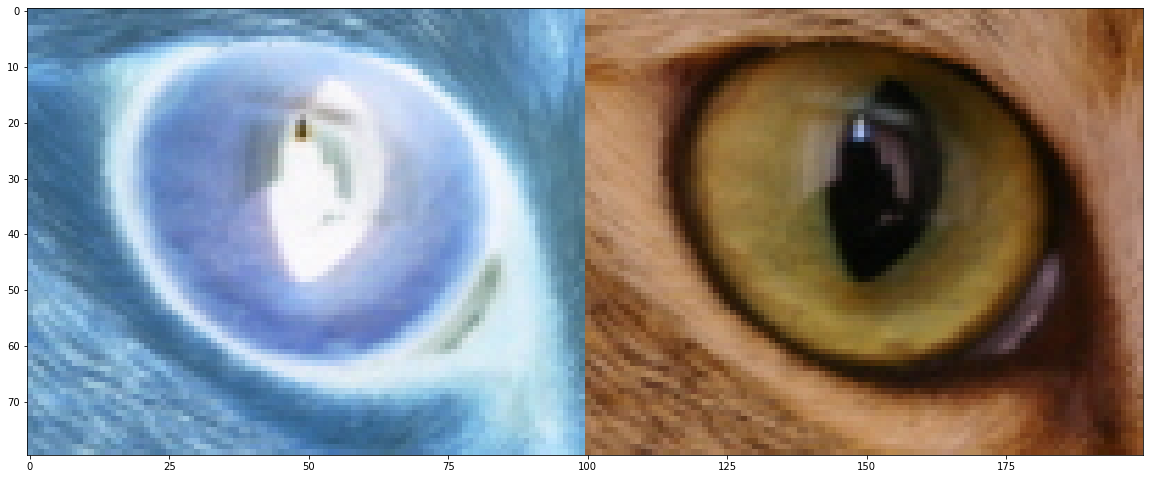

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(20, 10))  # explicitly create a figure to get the size set
plt.imshow(np.hstack([1 - im[80:160, 120:220], im[80:160, 120:220]]))